# Note

* This is version 1 of this notebook, Which contain full code to build classifier.

# Importing required libraries

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import scipy
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#importing required libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report,confusion_matrix

In [4]:
my_data_dir = './PP_woven_fabric_dataset_v1/'
train_path = my_data_dir + 'train/'
test_path = my_data_dir + 'test/'

image_shape = (300,300,1)
batch_size = 32 #according your model and your choise

# view some image of dataset

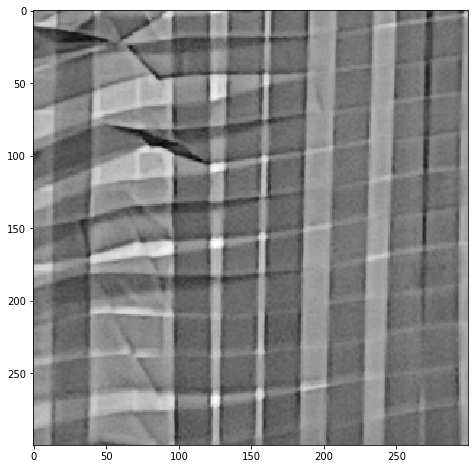

In [5]:
# view some images
img = plt.imread('./PP_woven_fabric_dataset_v1/train/defect/defect_19.jpg')
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

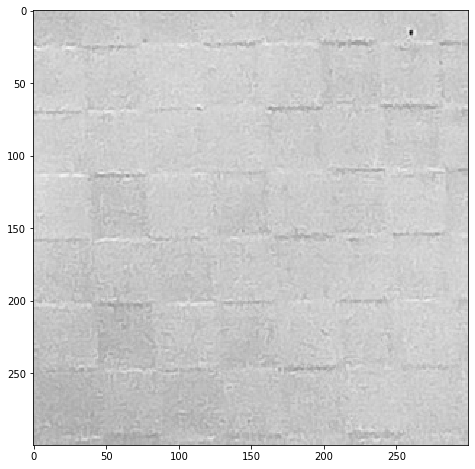

In [6]:
img1 = plt.imread('./PP_woven_fabric_dataset_v1/train/ok/ok_125.jpg')
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

# Data preparation

In [7]:
image_gen = ImageDataGenerator(rescale=1/255)# Rescale the image by normalzing it)


In [8]:
#we using keras inbuild function to ImageDataGenerator so we donnot need to lable all images into 0 and 1 it automatic create it and batch also during trainng 
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="grayscale",
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False)

Found 2555 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [9]:
train_set.class_indices

{'defect': 0, 'ok': 1}

As you can see imagedatagenerator automatic convert all images class to it's respective folder, def_front folder to 0 and ok_front to 1.
Which reduce our work to convert it  using for loop.

# Convolutional model creation

In [10]:
#Creating model

model = Sequential()

model.add(Conv2D(filters=8, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

# Last layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
results = model.fit_generator(train_set,epochs=20,
                              validation_data=test_set,
                             callbacks=[early_stop])

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 80 steps, validate for 7 steps
Epoch 1/20
80/80 [==============================] - 57s 713ms/step - loss: 0.6478 - accuracy: 0.6384 - val_loss: 0.6084 - val_accuracy: 0.6119
Epoch 2/20
80/80 [==============================] - 53s 667ms/step - loss: 0.5344 - accuracy: 0.7346 - val_loss: 0.5545 - val_accuracy: 0.6866
Epoch 3/20
80/80 [==============================] - 54s 677ms/step - loss: 0.4961 - accuracy: 0.7703 - val_loss: 0.4740 - val_accuracy: 0.7960
Epoch 4/20
80/80 [==============================] - 55s 684ms/step - loss: 0.4498 - accuracy: 0.8082 - val_loss: 0.3885 - val_accuracy: 0.8259
Epoch 5/20
80/80 [==============================] - 56s 695ms/step - loss: 0.3934 - accuracy: 0.8407 - val_loss: 0.3242 - val_accuracy: 0.8607
Epoch 6/20
80/80 [==============================] - 56s 694ms/step - loss: 0.3186 - accuracy: 0.8841 - val_loss: 0.384

# Analizing model performance

In [17]:
losses = pd.DataFrame(model.history.history)


In [18]:
losses[['loss','val_loss']].plot()

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
losses[['accuracy','val_accuracy']].plot()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-2530ab70d7c7>", line 1, in <module>
    losses[['accuracy','val_accuracy']].plot()
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_core.py", line 794, in __call__
    return plot_backend.plot(data, kind=kind, **kwargs)
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py", line 62, in plot
    plot_obj.generate()
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py", line 279, in generate
    self._compute_plot_data()
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py", line 404, in _compute_plot_data
    include=[np.number, "datetime", "datetimetz", "timedelta"]
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\pandas\core\frame.py"

TypeError: Cannot interpret '<attribute 'dtype' of 'numpy.generic' objects>' as a data type

In [ ]:
#first we will find predict probability
pred_probability = model.predict_generator(test_set)

Instructions for updating:
Please use Model.predict, which supports generators.


Instructions for updating:
Please use Model.predict, which supports generators.


In [ ]:
#here it's true label for test set
test_set.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [ ]:
predictions = pred_probability > 0.5
#if model predict greater than 0.5 it conveted to 1 means ok_front

In [ ]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.90      0.69      0.78       100
           1       0.75      0.92      0.83       101

    accuracy                           0.81       201
   macro avg       0.82      0.81      0.80       201
weighted avg       0.82      0.81      0.80       201



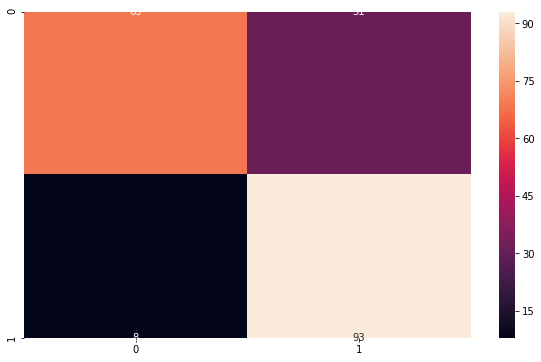

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_set.classes,predictions),annot=True)

# Predict on some test images

In [ ]:
#we already have string of test path
test_path

'./PP_woven_fabric_dataset_v1/test/'

In [ ]:
img = cv2.imread(test_path+'ok/ok_210.jpg',0)
img = img/255 #rescalinng
pred_img =img.copy()

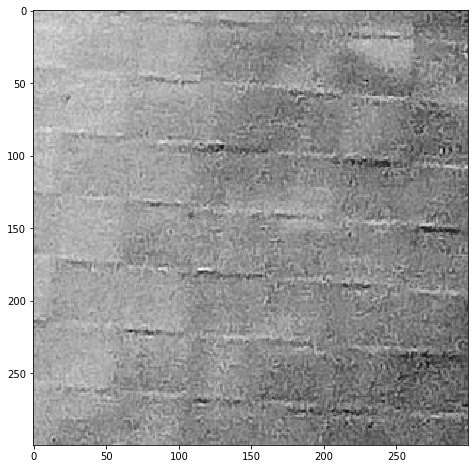

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img,cmap='gray')

In [16]:
prediction = model.predict(img.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def")
    cv2.putText(pred_img, "def", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok")
    cv2.putText(pred_img, "ok", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img,cmap='gray')
plt.axis('off')
plt.show()

ok


NameError: name 'pred_img' is not defined

In [ ]:
img1 = cv2.imread(test_path+'defect/defect_548.jpg',0)
img1 = img1/255
pred_img1 =img1.copy()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-e8f7c154455c>", line 2, in <module>
    img1 = img1/255
TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'TypeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "c:\Users\LENOVO\Anaconda3\li

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-29-553477068a3c>", line 2, in <module>
    plt.imshow(img1,cmap='gray')
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\pyplot.py", line 2683, in imshow
    None else {}), **kwargs)
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\__init__.py", line 1601, in inner
    return func(ax, *map(sanitize_sequence, args), **kwargs)
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py", line 369, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py", line 369, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py", line 5671, in imshow
    im.set_data(X)
  File "c:\Users\LENOVO\

TypeError: Image data of dtype object cannot be converted to float

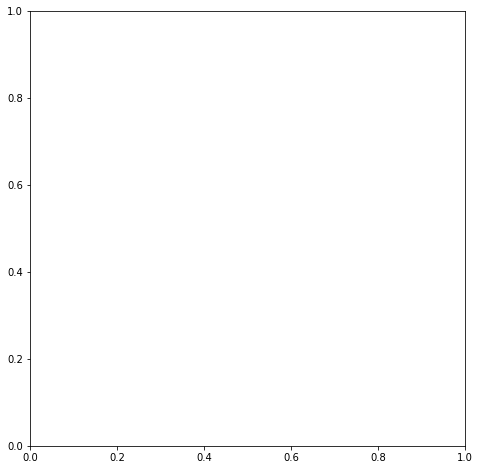

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(img1,cmap='gray')

In [ ]:
model.predict_proba(img.reshape(1,300,300,1))

array([[0.9582159]], dtype=float32)

In [ ]:
prediction = model.predict(img1.reshape(-1,300,300,1))
if (prediction<0.5):
    print("def")
    cv2.putText(pred_img1, "def", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
else:
    print("ok")
    cv2.putText(pred_img1, "ok", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)
    
plt.imshow(pred_img1,cmap='gray')
plt.axis('off')
plt.show()

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-30-d77b0cfd182e>", line 1, in <module>
    prediction = model.predict(img1.reshape(-1,300,300,1))
AttributeError: 'NoneType' object has no attribute 'reshape'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2040, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'AttributeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "c:\Users\LENOVO\Anaconda3\lib\site-packages\IPython\core\ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset

AttributeError: 'NoneType' object has no attribute 'reshape'

# saving the model

In [ ]:
model.save('defect_detection_pp_woven.h5')